# Preprocessing

## Import all the important libraries.



In [625]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#get model duration
import time
from datetime import date

## Read the dataset

In [626]:
insurance = pd.read_csv('/Users/markoglodovic/Downloads/customer-data.csv')

In [627]:
insurance.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [ ]:
#Data Description
#Age: age of primary beneficiary


#gender: insurance contractor gender, female, male


#race: majority and minority


#driving_experience


#education: none, high school, university


#Income: upper class, powerty, working class


#Credit score:


#vehicle_ownership


#vehicle_year


#married


#childreen


In [628]:
insurance.shape

(10000, 19)

In [629]:
insurance.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [630]:
insurance.dtypes

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                   bool
children                  bool
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                   bool
dtype: object

## Identify the missing values

In [631]:
insurance.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [632]:
insurance = insurance.dropna(subset=['credit_score'])

In [633]:
insurance = insurance.dropna(subset=['annual_mileage'])

In [634]:
insurance.isnull().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [635]:
total_miss = insurance.isnull().any()    # Looks like there are no missing values.
total_miss

id                     False
age                    False
gender                 False
race                   False
driving_experience     False
education              False
income                 False
credit_score           False
vehicle_ownership      False
vehicle_year           False
married                False
children               False
postal_code            False
annual_mileage         False
vehicle_type           False
speeding_violations    False
DUIs                   False
past_accidents         False
outcome                False
dtype: bool

# Feature Enginerring and EDA

In [594]:
insurance.corr()   # Checking correlation between the features.

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
id,1.000000,-0.002144,0.004358,0.009331,-0.000431,-0.001299,0.002282,0.012750,0.006082,0.006239,-0.006222
credit_score,-0.002144,1.000000,0.312995,0.282555,0.221354,0.007465,-0.174453,0.208433,0.127888,0.182408,-0.321436
vehicle_ownership,0.004358,0.312995,1.000000,0.170752,0.116477,-0.010469,-0.093710,0.133302,0.087432,0.121881,-0.386217
married,0.009331,0.282555,0.170752,1.000000,0.293613,0.010056,-0.465642,0.216213,0.119750,0.214767,-0.253200
children,-0.000431,0.221354,0.116477,0.293613,1.000000,0.019260,-0.451105,0.224753,0.113996,0.204888,-0.230255
postal_code,-0.001299,0.007465,-0.010469,0.010056,0.019260,1.000000,-0.130169,0.113228,0.034591,-0.120617,0.095939
annual_mileage,0.002282,-0.174453,-0.093710,-0.465642,-0.451105,-0.130169,1.000000,-0.318478,-0.113474,-0.195160,0.184865
speeding_violations,0.012750,0.208433,0.133302,0.216213,0.224753,0.113228,-0.318478,1.000000,0.365700,0.445531,-0.293138
DUIs,0.006082,0.127888,0.087432,0.119750,0.113996,0.034591,-0.113474,0.365700,1.000000,0.264834,-0.190015
past_accidents,0.006239,0.182408,0.121881,0.214767,0.204888,-0.120617,-0.195160,0.445531,0.264834,1.000000,-0.312738


<AxesSubplot:>

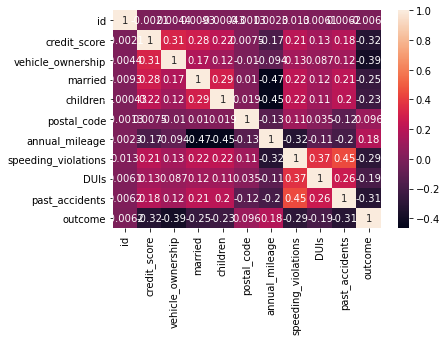

In [595]:
#heat map, smoking, age and bmi have a stronger relationship with charges
sns.heatmap(insurance.corr(), annot=True)

<AxesSubplot:xlabel='age', ylabel='credit_score'>

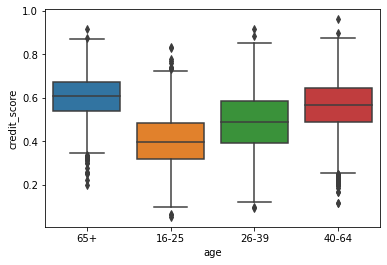

In [636]:
sns.boxplot(x = 'age',y='credit_score', data = insurance)

In [637]:
insurance.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [638]:
insurance.dtypes

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                   bool
children                  bool
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                   bool
dtype: object

## Lets change some data type to objects

In [642]:
insurance = insurance.astype({"married": str, "children": str, 'outcome': str})

In [643]:
insurance.dtypes

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                 object
children                object
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                 object
dtype: object

## Lets encode columns for modeling

In [644]:
for col in ['age','gender','married','children','outcome']:
    print( col,':')
    print(insurance[col].value_counts())

age :
26-39    2475
40-64    2412
65+      1641
16-25    1621
Name: age, dtype: int64
gender :
female    4084
male      4065
Name: gender, dtype: int64
married :
True     4083
False    4066
Name: married, dtype: int64
children :
True     5617
False    2532
Name: children, dtype: int64
outcome :
False    5613
True     2536
Name: outcome, dtype: int64


In [645]:
# label endcoding for the object datatypes
for col in ['age','gender','married','children','outcome']:
    if (insurance[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(insurance[col])
        insurance[col] = le.transform(insurance[col])
        print('Completed Label encoding on',col)

Completed Label encoding on age
Completed Label encoding on gender
Completed Label encoding on married
Completed Label encoding on children
Completed Label encoding on outcome


In [646]:
insurance.to_csv('insurance_encoded.csv',index = False)

## Splitting independent and dependent variables

In [647]:

insurance_target = insurance['outcome']

In [648]:
insurance_input = insurance[['age','gender','married', 'children']]

## Feature scaling

In [649]:
#stadardize data    
x_scaled = StandardScaler().fit_transform(insurance_input)

## Train/Test split

In [650]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,
                                                    insurance_target,
                                                    test_size = 0.25,
                                                    random_state=1211)

# Build Models

## 1. Linear Regression

In [651]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

start_time = time.time()

# fit linear model to the train set data
linReg_model = linReg.fit(x_train, y_train)

today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.010998010635375977 seconds ---


In [652]:
linReg.coef_

array([-0.17905894,  0.04625589, -0.04290564, -0.02293153])

In [653]:
#get coefficient values

input_columns = insurance_input.columns #get feature names

coeff_df = pd.DataFrame(linReg.coef_, input_columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age,-0.179059
gender,0.046256
married,-0.042906
children,-0.022932


In [654]:
#validate model
y_pred_train = linReg.predict(x_train)    # Predict on train data.
y_pred_train[y_pred_train < 0] = y_pred_train.mean()
y_pred = linReg.predict(x_test)   # Predict on test data.
y_pred[y_pred < 0] = y_pred.mean()
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
diff.head(5)

,Actual,Predicted
9555,0,0.303192
1140,0,0.116209
2635,1,0.640293
3698,0,0.116209
8130,1,0.515149


In [655]:
# Since above graph is not very clear, we will plot first 10 values.
diff1 = diff.head(10)
diff1

,Actual,Predicted
9555,0,0.303192
1140,0,0.116209
2635,1,0.640293
3698,0,0.116209
8130,1,0.515149
698,0,0.030398
6774,1,0.303192
3322,0,0.287275
5127,0,0.340455
3472,0,0.205092


## Plotting the actual and Predicted.

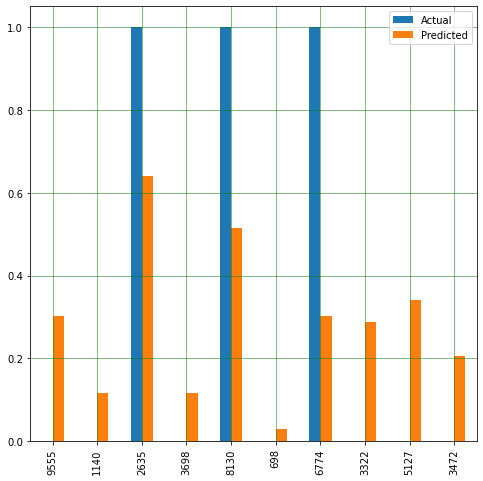

In [656]:
diff1.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [657]:
def calculate_accuracy(actual, predicted):
    SST = 0
    SSR = 0
    SSE = 0
    RMSE = 0
    VIF = 0
    RSqr = 0
    MAE = 0
    MAPE = 0
    SST = sum((actual - np.mean(predicted))**2)    # Calculate the SST
    SSR = sum((predicted - np.mean(predicted))**2) # Calculate the SSR
    SSE = sum((actual - predicted)**2)             # Calculate the SSE
    RMSE = np.sqrt((sum((predicted - actual)**2))/len(predicted))  # Calculate the RMSE
    RSqr = 1 - (SSE/SST)                           # Calcualte the R_square
    if RSqr != 1:
        VIF = 1 / (1 - RSqr)                           # Calculate the VIF
    #MAPE_house_price = mape(dtc_predict_train, y_train)           # Calculate the MAPE
    #MAE_house_price = mae(y_train, dtc_predict_train)             # Calculate the MAE
    return RMSE, RSqr, VIF

In [658]:
# Finding MAE, MSE and other, metrics.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print the intercept and coefficients
print('Intercept: ',linReg.intercept_)
#print('r2 score: ',linReg.score(x_train, y_train))
#print('r2 score: ',linReg.score(x_test, y_test))

Mean Absolute Error: 0.35963046162097806
Mean Squared Error: 0.17427127472451615
Root Mean Squared Error: 0.4174581113411454
Intercept:  0.3043201635377515


In [659]:
# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,y_pred_train)
print('Linear RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,y_pred)
print('Linear RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Linear RMSE train =  0.4119749316644422 R-Square train =  0.20177862588167184 VIF train =  1.2527852954383056
Linear RMSE test =  0.4174581113411453 R-Square test =  0.21266440275899923 VIF test =  1.2701064241274276


In [660]:
#Backward elimination to check for high significance feature

import statsmodels.api as sm
a = 0
b = 0
a, b = x_scaled.shape
x_scaled = np.append(arr = np.ones((a, 1)).astype(int), values = x_scaled, axis = 1)
print (x_scaled.shape)

x_scaled_opt = x_scaled
##OrdinaryLeastSquares
regressorOLS = sm.OLS(endog = insurance_target, exog = x_scaled_opt).fit()
regressorOLS.summary()

(8149, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     569.7
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:42:49   Log-Likelihood:                -4282.5
No. Observations:                8149   AIC:                             8575.
Df Residuals:                    8144   BIC:                             8610.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3112      0.005     68.623      0.000       0.302       0.320
x1            -0.1805      0.005    -34.974      0.000      -0.191      -0.170
x2             0.0481      0.005     10.606      0.000       0.039       0.057
x3            -0.0420      0.005     -8.443      0.000      -0.052      -0.032
x4            -0.0246      0.005     -4.917      0.000      -0.034      -0.015
==============================================================================
Omnibus:                      772.511   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.762
Skew:                           0.563   Prob(JB):                    1.42e-128
Kurtosis:                       2.316   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Decision Tree

In [661]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=1)

# create the model
dtc.fit(x_train,y_train)

# prediction on train data
dtc_predict_train = dtc.predict(x_train)

# prediction on test data
dtc_predict_test = dtc.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,dtc_predict_train)
print('Decision Tree RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,dtc_predict_test)
print('Decision Tree RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Decision Tree RMSE train =  0.3989453986894487 R-Square train =  0.2487489698265768 VIF train =  1.3311129833248336
Decision Tree RMSE test =  0.40691323523567335 R-Square test =  0.2540532308892369 VIF test =  1.3405782307926497


## Random Forest

In [662]:
from sklearn.ensemble import RandomForestRegressor
# Random forest model
rfc = RandomForestRegressor()

rfc.fit(x_train,y_train)

# prediction on train data
rfc_predict_train = rfc.predict(x_train)

# prediction on test data
rfc_predict_test = rfc.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,rfc_predict_train)
print('Random Forest RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,rfc_predict_test)
print('Random Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Random Forest RMSE train =  0.3989512288465472 R-Square train =  0.24872703318770017 VIF train =  1.3310741157678883
Random Forest RMSE test =  0.40683228045646247 R-Square test =  0.25434341250537085 VIF test =  1.341099933630242


In [663]:
print('Metrics of linear regression:')
RMSE, RSqr, VIF = calculate_accuracy(y_train,y_pred_train)
print('Linear RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)
RMSE, RSqr, VIF = calculate_accuracy(y_test,y_pred)
print('Linear RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)
print('                                  ')

print('Metrics of Decision Tree:')
RMSE, RSqr, VIF = calculate_accuracy(y_train,dtc_predict_train)
print('Decision Tree RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)
RMSE, RSqr, VIF = calculate_accuracy(y_test,dtc_predict_test)
print('Decision Tree RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)
print('                                  ')

print('Metrics of Random Forest:')
RMSE, RSqr, VIF = calculate_accuracy(y_train,rfc_predict_train)
print('Random Forest RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)
RMSE, RSqr, VIF = calculate_accuracy(y_test,rfc_predict_test)
print('Random Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Metrics of linear regression:
Linear RMSE train =  0.4119749316644422 R-Square train =  0.20177862588167184 VIF train =  1.2527852954383056
Linear RMSE test =  0.4174581113411453 R-Square test =  0.21266440275899923 VIF test =  1.2701064241274276
                                  
Metrics of Decision Tree:
Decision Tree RMSE train =  0.3989453986894487 R-Square train =  0.2487489698265768 VIF train =  1.3311129833248336
Decision Tree RMSE test =  0.40691323523567335 R-Square test =  0.2540532308892369 VIF test =  1.3405782307926497
                                  
Metrics of Random Forest:
Random Forest RMSE train =  0.3989512288465472 R-Square train =  0.24872703318770017 VIF train =  1.3310741157678883
Random Forest RMSE test =  0.40683228045646247 R-Square test =  0.25434341250537085 VIF test =  1.341099933630242


In [664]:
import pickle

In [665]:
# save the model to disk
filename = 'streamlit_insurance_predictcharges.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [666]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.2522353977065347
